<a href="https://colab.research.google.com/github/ahmadcah/Data-Analysis-Manipulation-Introduction-to-Colab/blob/main/Project_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2019 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Dataset Exploration


For this project you will be given a dataset and an associated problem. Over the course of the day, you will explore the dataset and train the best model you can in order to solve the problem. At the end of the day, you will give a short presentation about your model and solution.

### Deliverables

1. A **copy of this Colab notebook** containing your code and responses to the ethical considerations below.
1. At the end of the day, we will ask you and your group to stand in front of the class and give a brief **presentation about what you have done**. 

## Team

Please enter your team members' names in the placeholders in this text area:

*   *Team Member Placeholder*
*   *Team Member Placeholder*
*   *Team Member Placeholder*



# Exercises

## Exercise 1: Coding

[Kaggle](http://www.kaggle.com) hosts a [dataset containing US airline on-time statistics and delay data](https://www.kaggle.com/giovamata/airlinedelaycauses) from the [US Department of Transportation's Bureau of Transportation Statistics (BTS)](https://www.bts.gov/). In this project, we will **use flight statistics data to gain insights into US airports' and airlines' flights in 2008.**

You are free to use any toolkit we've covered in class to solve the problem (e.g. Pandas, Matplotlib, Seaborn).

Demonstrations of competency:
1. Get the data into a Python object.
1. Inspect the data for each column's data type and summary statistics.
1. Explore the data programmatically and visually.
1. Produce an answer and visualization, where applicable, for at least three questions from the list below, and discuss any relevant insights. Feel free to generate and answer some of your own questions. 

  * Which U.S. airport is the busiest airport? You can decide how you'd like to measure "business" (e.g., annually, monthly, daily).
  * Of the 2008 flights that are *actually delayed*, think about:
    * Which 10 U.S. airlines have the most delays?
    * Which 10 U.S. airlines have the longest average delay time?
    * Which 10 U.S. airports have the most delays?
    * Which 10 U.S. airports have the longest average delay time?
  * More analysis:
    * Are there patterns on how flight delays are distributed across different hours of the day?
    * How about across months or seasons? Can you think of any reasons for these seasonal delays?
    * If you look at average delay time or number of delays by airport, does the data show linearity? Does any subset of the data show linearity?
    * Add reason for delay to your delay analysis above.
    * Examine flight frequencies, delays, time of day or year, etc. for a specific airport, airline or origin-arrival airport pair.

### Student Solution

In [2]:
# Use as many text and code blocks as you need to create your solution.
# Make sure to take notes and add lots of code comments, so your instructor
# understands what you are doing!
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [3]:
! kaggle datasets download giovamata/airlinedelaycauses
! ls

 69% 46.0M/66.6M [00:00<00:00, 44.9MB/s]
100% 66.6M/66.6M [00:00<00:00, 135MB/s] 
airlinedelaycauses.zip	sample_data


In [6]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('airlinedelaycauses.zip') 
df = pd.read_csv(zf.open('DelayedFlights.csv'))
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bde9ff4d0>,
      dtype=object)

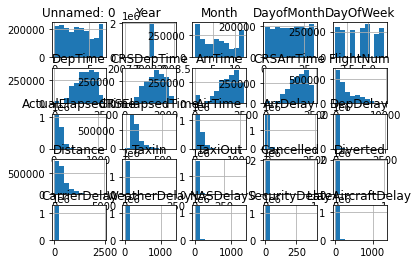

In [9]:
df.hist()

In [12]:
for i in df.columns:  
  print(i+": "+str(df[i].isnull().any()))

Unnamed: 0: False
Year: False
Month: False
DayofMonth: False
DayOfWeek: False
DepTime: False
CRSDepTime: False
ArrTime: True
CRSArrTime: False
UniqueCarrier: False
FlightNum: False
TailNum: True
ActualElapsedTime: True
CRSElapsedTime: True
AirTime: True
ArrDelay: True
DepDelay: False
Origin: False
Dest: False
Distance: False
TaxiIn: True
TaxiOut: True
Cancelled: False
CancellationCode: False
Diverted: False
CarrierDelay: True
WeatherDelay: True
NASDelay: True
SecurityDelay: True
LateAircraftDelay: True


In [14]:
df = df.dropna()
for i in df.columns:  
  print(i+": "+str(df[i].isnull().any()))

Unnamed: 0: False
Year: False
Month: False
DayofMonth: False
DayOfWeek: False
DepTime: False
CRSDepTime: False
ArrTime: False
CRSArrTime: False
UniqueCarrier: False
FlightNum: False
TailNum: False
ActualElapsedTime: False
CRSElapsedTime: False
AirTime: False
ArrDelay: False
DepDelay: False
Origin: False
Dest: False
Distance: False
TaxiIn: False
TaxiOut: False
Cancelled: False
CancellationCode: False
Diverted: False
CarrierDelay: False
WeatherDelay: False
NASDelay: False
SecurityDelay: False
LateAircraftDelay: False


In [42]:
df.corr()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,1.000000,NaN,0.996339,0.062950,0.009053,-0.011060,-0.014645,-0.003833,-0.001177,-0.017893,0.026676,0.028570,0.019850,0.015138,0.016330,0.026163,0.035626,0.021601,NaN,NaN,0.003527,0.005585,0.017511,-0.003797,0.001457
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.996339,NaN,1.000000,0.067025,0.009288,-0.008761,-0.013436,-0.001955,-0.001815,0.002552,0.003977,0.006615,0.000108,0.012338,0.015400,0.005831,0.023901,0.008151,NaN,NaN,0.000419,0.006614,0.011441,-0.003066,0.004953
DayofMonth,0.062950,NaN,0.067025,1.000000,0.025953,0.003398,0.003589,0.003411,0.003952,-0.004902,-0.000012,0.000557,0.000363,0.009072,0.009867,-0.000213,-0.001363,-0.001040,NaN,NaN,-0.000946,0.000899,0.005644,-0.000308,0.009101
DayOfWeek,0.009053,NaN,0.009288,0.025953,1.000000,0.021415,0.027812,0.007273,0.017265,-0.010011,0.004540,0.006200,0.005844,0.011901,0.013796,0.008989,0.011955,-0.008534,NaN,NaN,0.010215,0.005644,-0.006628,0.004665,0.008839
DepTime,-0.011060,NaN,-0.008761,0.003398,0.021415,1.000000,0.840260,0.373225,0.714217,-0.031745,-0.056818,-0.041476,-0.058621,0.093979,0.115809,-0.054876,-0.025117,0.002417,NaN,NaN,-0.051948,0.005304,0.022530,-0.015273,0.169453
CRSDepTime,-0.014645,NaN,-0.013436,0.003589,0.027812,0.840260,1.000000,0.287631,0.725630,-0.066639,-0.040359,-0.022065,-0.037336,0.017093,0.040455,-0.025229,-0.043289,-0.006671,NaN,NaN,-0.107337,-0.009333,-0.032701,-0.017064,0.167734
ArrTime,-0.003833,NaN,-0.001955,0.003411,0.007273,0.373225,0.287631,1.000000,0.480985,-0.003610,-0.028274,-0.029262,-0.031891,-0.079235,-0.080249,-0.044229,0.043106,-0.007793,NaN,NaN,-0.083980,-0.029867,0.032395,-0.007417,-0.037949
CRSArrTime,-0.001177,NaN,-0.001815,0.003952,0.017265,0.714217,0.725630,0.480985,1.000000,-0.071523,0.034482,0.048096,0.029776,0.024998,0.039587,0.032266,0.003945,0.026325,NaN,NaN,-0.096156,-0.005028,0.009227,-0.013349,0.131467
FlightNum,-0.017893,NaN,0.002552,-0.004902,-0.010011,-0.031745,-0.066639,-0.003610,-0.071523,1.000000,-0.326812,-0.341747,-0.346516,0.035803,0.034077,-0.362589,-0.005767,0.001858,NaN,NaN,0.055713,0.067477,0.015405,-0.002809,-0.052707


In [41]:
dfca = df.groupby('Origin')[['Origin']].count()
dfcd = df.groupby('Dest')[['Dest']].count()
dfct = dfca['Origin'] + dfcd['Dest']
dfct.sort_values(ascending=False).head()

ORD    170237.0
ATL    159348.0
DFW    108037.0
DEN     85090.0
EWR     76988.0
dtype: float64

In [47]:
dfdel = df.groupby('UniqueCarrier')[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay','LateAircraftDelay']].count()
dfdel['Total Delay'] = dfdel.sum(axis=1)
dfdel.sort_values(by='Total Delay', ascending=False).head()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total Delay
UniqueCarrier,,,,,,,,
WN,203559,203559,203559,203559,203559,203559,203559,1424913
AA,132257,132257,132257,132257,132257,132257,132257,925799
MQ,97555,97555,97555,97555,97555,97555,97555,682885
UA,95465,95465,95465,95465,95465,95465,95465,668255
OO,88991,88991,88991,88991,88991,88991,88991,622937


In [50]:
dfdel = df.groupby('UniqueCarrier')[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay','LateAircraftDelay']].mean()
dfdel['Mean Delay'] = dfdel.mean(axis=1)
dfdel.sort_values(by='Mean Delay', ascending=False).head()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Mean Delay
UniqueCarrier,,,,,,,,
B6,78.605906,72.792478,17.684819,1.444314,25.599786,0.054745,33.822243,32.857756
YV,71.099376,68.814872,37.633791,3.657643,13.345931,0.173538,16.288473,30.144803
XE,70.199575,66.019914,16.914912,3.436924,22.409802,0.182938,27.254999,29.488438
UA,69.491740,67.220772,18.018646,2.243042,15.363421,0.017399,33.849233,29.457750
CO,67.464076,63.446640,16.896112,3.397028,25.704739,0.193222,21.272974,28.339256


In [55]:
dfdelo = df.groupby('Origin')[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay','LateAircraftDelay']].count()
dfdeld = df.groupby('Dest')[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay','LateAircraftDelay']].count()
dfdelt = dfdelo[dfdelo.columns] + dfdeld[dfdeld.columns]
dfdelt['Total Delay'] = dfdel.sum(axis=1)
dfdelt.sort_values(by='Total Delay', ascending=False).head()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total Delay
ORD,170237.0,170237.0,170237.0,170237.0,170237.0,170237.0,170237.0,557382.0
ATL,159348.0,159348.0,159348.0,159348.0,159348.0,159348.0,159348.0,501249.0
DFW,108037.0,108037.0,108037.0,108037.0,108037.0,108037.0,108037.0,321748.0
EWR,76988.0,76988.0,76988.0,76988.0,76988.0,76988.0,76988.0,286111.0
DEN,85090.0,85090.0,85090.0,85090.0,85090.0,85090.0,85090.0,270291.0


In [56]:
dfdelo = df.groupby('Origin')[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay','LateAircraftDelay']].mean()
dfdeld = df.groupby('Dest')[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay','LateAircraftDelay']].mean()
dfdelt = dfdelo[dfdelo.columns] + dfdeld[dfdeld.columns]
dfdelt['Mean Delay'] = dfdel.mean(axis=1)
dfdelt.sort_values(by='Mean Delay', ascending=False).head()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Mean Delay
ORD,149.933809,137.688174,33.437292,7.196346,50.181909,0.064304,59.053958,79626.0
ATL,128.040751,117.432535,42.559754,10.101965,33.280237,0.077804,42.020991,71607.0
DFW,119.260487,112.591579,42.204623,8.102375,20.843837,0.068977,48.040676,45964.0
EWR,153.099537,144.809283,29.372657,6.168829,67.839827,0.174875,49.543350,40873.0
DEN,114.060832,108.683772,34.789946,4.834372,20.703005,0.117361,53.616149,38613.0


## Exercise 2: Ethical Implications

Even the most basic of data manipulations has the potential to affect segments of the population in different ways. It is important to consider how your code might positively and negatively affect different types of users.

In this section of the project, you will reflect on the ethical implications of your analysis.

### Student Solution

**Positive Impact**

Your analysis is trying to solve a problem. Think about who will benefit if the problem is solved, and write a brief narrative about how the model will help.

*\[Hypothetical entities\] will benefit because...*

**Negative Impact**

Solutions usually don't have a universal benefit. Think about who might be negatively impacted by your analysis. This person or persons might not be directly considered in the analysis, but they might be impacted indirectly.

*\[Hypothetical entity\] will be negatively impacted because...*

**Bias**

Data analysis can be biased for many reasons. The bias can come from the data itself (e.g. sampling, data collection methods, available sources), and from the interpretation of the analysis outcome.

Think of at least two ways that bias might have been introduced to your analysis and explain them below.

*One source of bias in the analysis could be...*

*Another source of bias in the analysis could be...*

**Changing the Dataset to Mitigate Bias**

The most common way that an analysis is biased is when the dataset itself is biased. Look back at the input data that you used for your analysis. Think about how you might change something about the data to reduce bias in your model.

What changes could you make to make your dataset less biased? Consider the data that you have, how and where that data was collected, and what other sources of data might be used to reduce bias.

Write a summary of the changes that could be made to your input data.

*Since the data has potential bias X, we can adjust...*

**Changing the Analysis Questions to Mitigate Bias**

Are there any ways to reduce bias by changing the analysis itself? This could include modifying the choice of questions you ask, the approach you take to answer the questions, etc.

Write a brief summary of any changes that you could make to help reduce bias in your analysis.

*Since the analysis has potential bias X, we can adjust...*

**Mitigating Bias Downstream**

While analysis can point to suggestions, it is people who make decisions based on them. What processes and/or rules should be in place for people and systems interpreting and acting on the results of your analysis to reduce the bias? Describe these below.

*Since the analysis has potential bias X, we can implement processes...*